# Learning Seattle's Work Habits from Bicycle Counts Data

This notebook originally appeared as a [post](http://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/) by Jake VanderPlas on the blog [Pythonic Perambulations](http://jakevdp.github.io) and [the related video series](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)  Also adapted from by Amit Aides's "Intro session to data science with Python". 



The content is MIT licensed.*

## The Data

The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. 

A time series is any data set where the values are measured at different points in time.

### Exercise 1: 

Understand the bike data.  Learn how to use curl command to download data. 


In [1]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [2]:
import pandas as pd
data = pd.read_csv('FremontBridge12-16.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [3]:
data.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2016-12-31 19:00:00,4.0,6.0
2016-12-31 20:00:00,6.0,3.0
2016-12-31 21:00:00,6.0,4.0
2016-12-31 22:00:00,8.0,7.0
2016-12-31 23:00:00,4.0,4.0


In [4]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

We'll do some quick data cleaning: we'll rename the columns to the shorter "West" and "East", set any missing values to zero, and add a "Total" column:

In [5]:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)

### Exercise 2: 

Add a new column of total which is the sum of east and west bike count. 

In [6]:
# to do:
# data['Total'] = 
data.head()

,West,East
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


## Visualize the Data

With matplotlib and seaborn, we can visualize our Pandas time series data. 

In [7]:
# first some standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()  # plot styling
seaborn.set_context(font_scale=1.5)
import numpy as np

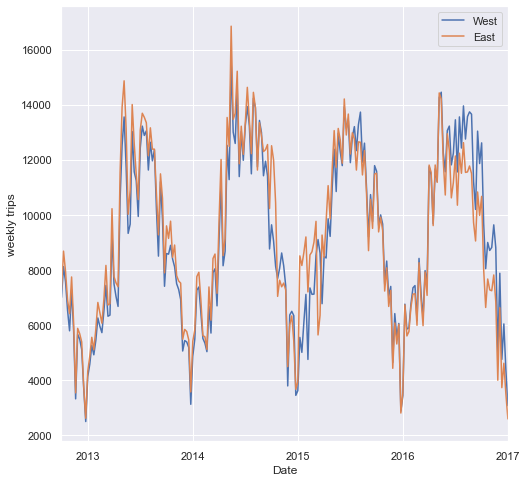

In [8]:
data.resample('W').sum().plot(figsize=(8, 8))
plt.ylabel('weekly trips');

### Exercise 3: 

Since the data is a time serie and is indexed by a timestamp, we can resample the data at a different frequency. Now resample the data to have the monthly total.  Plot out results. 

In [9]:
# to do: 
# data.resample ... 

Group the data by the 12 monthes and plot out the mean.  

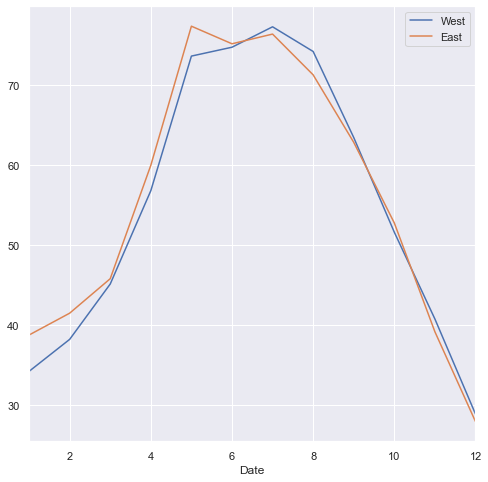

In [10]:
data.groupby(data.index.month).mean().plot(figsize=(8, 8));

### Exercise 4: 

Group the data by the time (24 hours) and plot out the mean.  

In [11]:
# to do: 


## Unsupervised Learning Extracting: Knowledge from the Data

From here, we could do a variety of other visualizations based on our intuition about what might affect bicycle counts. And we could also proceed by letting the dataset speak for itself, and use *unsupervised machine learning* techniques (that is, machine learning without reference to data labels) to learn what the data have to tell us.

We will consider each day in the dataset as a sample. 
For each day, we have 48 observations: two observations (east and west sidewalk sensors) for each of the 24 hour-long periods. The goal is to find out how what differen kinds of days are there relavent to the bike traffic. 

## Transforming the Data

In [12]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour)
pivoted.head()

East                                                         ...  \
Date         0     1    2    3    4     5      6      7      8      9   ...   
2012-10-03  4.0   4.0  1.0  2.0  6.0  21.0  105.0  257.0  291.0  172.0  ...   
2012-10-04  7.0   3.0  3.0  0.0  7.0  15.0   91.0  230.0  284.0  147.0  ...   
2012-10-05  4.0   4.0  4.0  2.0  7.0  18.0   68.0  218.0  251.0  131.0  ...   
2012-10-06  8.0  10.0  7.0  1.0  4.0   3.0   12.0   17.0   58.0   59.0  ...   
2012-10-07  6.0  12.0  2.0  4.0  1.0   6.0    9.0   14.0   43.0   67.0  ...   

             West                                                             
Date           14     15     16     17     18     19    20    21    22    23  
2012-10-03   51.0   92.0  182.0  391.0  258.0   69.0  51.0  38.0  25.0  12.0  
2012-10-04   56.0   74.0  161.0  353.0  241.0  107.0  56.0  39.0  21.0  30.0  
2012-10-05   62.0   84.0  190.0  290.0  209.0   73.0  41.0  31.0  26.0  16.0  
2012-10-06  114.0   96.0   76.0   73.0   55.0   38.0  18.0  15.0  20.0  19.0  
2012-10-07  115.0  109.0   93.0   73.0   45.0   23.0  36.0  35.0   9.0  11.0  

[5 rows x 48 columns]

First let's check the first 5 records from the East sidewalk counter. 

In [13]:
first_five_east = pivoted.iloc[:5, :24]
first_five_east

East                                                         ...  \
Date         0     1    2    3    4     5      6      7      8      9   ...   
2012-10-03  4.0   4.0  1.0  2.0  6.0  21.0  105.0  257.0  291.0  172.0  ...   
2012-10-04  7.0   3.0  3.0  0.0  7.0  15.0   91.0  230.0  284.0  147.0  ...   
2012-10-05  4.0   4.0  4.0  2.0  7.0  18.0   68.0  218.0  251.0  131.0  ...   
2012-10-06  8.0  10.0  7.0  1.0  4.0   3.0   12.0   17.0   58.0   59.0  ...   
2012-10-07  6.0  12.0  2.0  4.0  1.0   6.0    9.0   14.0   43.0   67.0  ...   

                                                                             
Date           14     15     16     17     18    19    20    21    22    23  
2012-10-03   77.0   72.0  133.0  192.0  122.0  59.0  29.0  25.0  24.0   5.0  
2012-10-04   63.0   73.0  114.0  154.0  137.0  57.0  27.0  31.0  25.0  11.0  
2012-10-05   63.0   80.0  120.0  144.0  107.0  42.0  27.0  11.0  10.0  16.0  
2012-10-06   89.0  115.0  107.0  107.0   41.0  40.0  25.0  18.0  14.0  15.0  
2012-10-07  126.0  122.0  132.0  118.0   68.0  26.0  19.0  12.0   9.0   5.0  

[5 rows x 24 columns]

### Exercise 5: 
In the pivot table, slice the first 5 records from the West bound traffic. 

In [14]:
# to do:
# first_five_west ...

Now we try to figure out some patterns from the data. Let's start with the first five east bound records. 

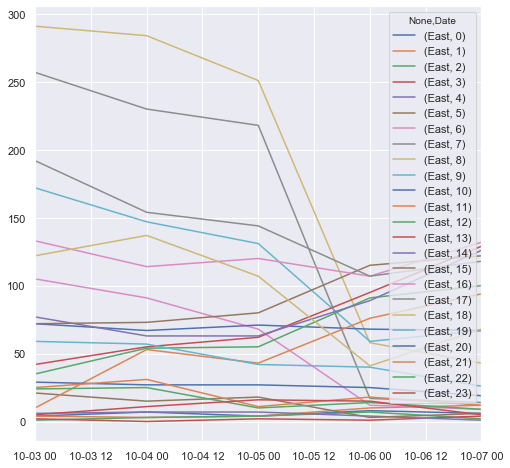

In [15]:
first_five_east.plot(figsize=(8, 8))

Let's try transpose the data.  

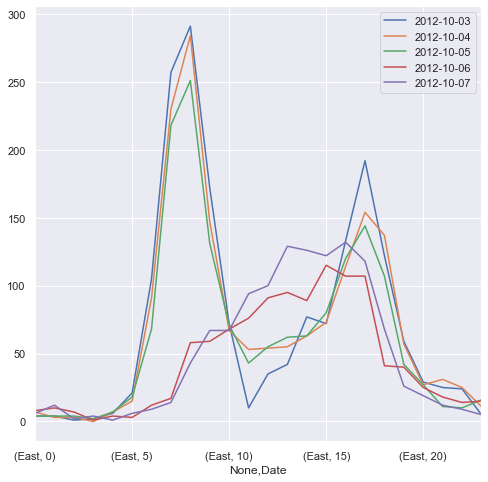

In [16]:
first_five_east.T.plot(figsize=(8, 8))

Now we can plot the data collected east bound for all the dates 

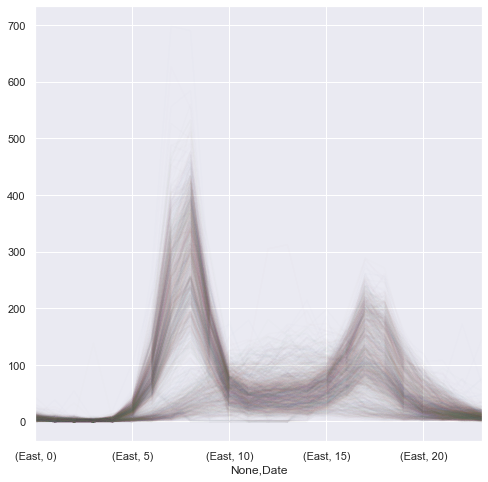

In [17]:
east = pivoted.iloc[:, :24]
east.T.plot(legend=False, alpha=0.01, figsize=(8, 8))

### Exercise 6:

Plot all the records from the West bound counter for all the dates. 

In [18]:
# to do:
# west = ...

These plots give us some insight into the data. It looks like there are two types of clusters: the first cluster shows a sharp bimodal traffic pattern, while the second shows a wide unimodal pattern. In the bimodal cluster, we see a peak in the morning and another peak in the afternoon which is clearly a commute pattern. 


## Dimensionality Reduction

We can think of this data now as representing more than 1000 distinct objects which live in a *48-dimensional* space: the value of each dimension is the number of bicycle trips measured on a particular side of the bridge at a particular hour.
Visualizing 48-dimensional data is quite difficult, so instead we will use a standard *dimensionality reduction* technique to project this to a more manageable size.

The technique we'll use is [Principal Component Analysis (PCA)](http://scikit-learn.org/stable/modules/decomposition.html), a fast linear projection which rotates the data such that the projection preserves the maximum variance.
We can ask for components preserving 90% of the variance as follows:

We first extract the raw values and put them in a matrix:

In [19]:
X = pivoted.values
X.shape

(1551, 48)

In [20]:
from sklearn.decomposition import PCA

#Xpca = PCA(n_components=2).fit_transform(X)
Xpca = PCA(0.90, svd_solver='full').fit_transform(X)
Xpca.shape

(1551, 2)

The output has two dimensions, which means that these two projected components describe at least 90% of the total variance in the dataset.
While 48-dimensional data is difficult to plot, we certainly know how to plot two-dimensional data: we'll do a simple scatter plot, and for reference we'll color each point according to the total number of trips taken that day:

## Exercise 7:

In this PCA analysis above, how many projected components are needed to describe at least 95% of the total variance in the dataset? 

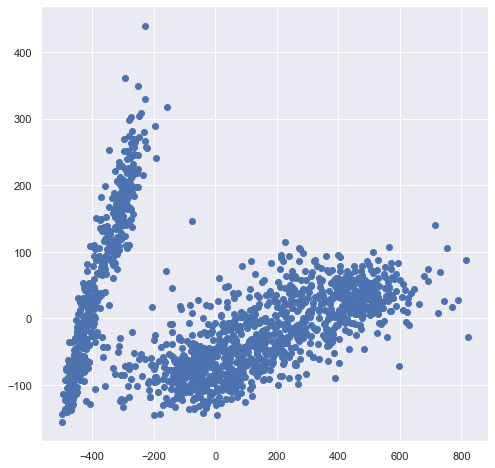

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(Xpca[:,0], Xpca[:, 1])

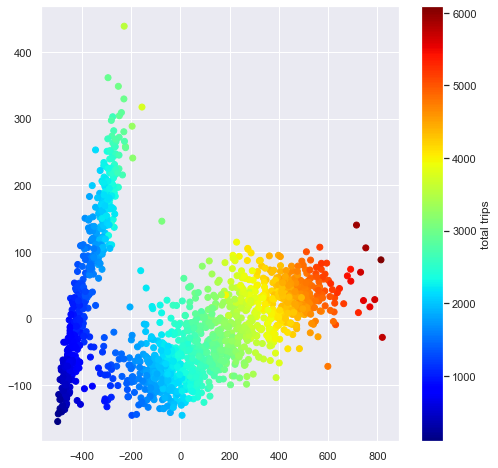

In [22]:
total_trips = X.sum(1)

plt.figure(figsize=(8, 8))
plt.scatter(
    Xpca[:, 0],
    Xpca[:, 1],
    c=total_trips,
    cmap='jet'
)

plt.colorbar(label='total trips');

We see that the days lie in two quite distinct groups, and that the total number of trips increases along the length of each projected cluster.
Further, the two groups begin to be less distinguishable when the number of trips during the day is very small.

I find this extremely interesting: from the raw data, we can determine that there are basically *two primary types of days* for Seattle bicyclists.
Let's model these clusters and try to figure out what these types-of-day are.

## Unsupervised Clustering

When you have groups of data you'd like to automatically separate, but no previously-determined labels for the groups, the type of algorithm you are looking at is a *clustering* algorithm.
There are a number of clustering algorithms out there, but for nicely-defined oval-shaped blobs like we see above, [Gaussian Mixture Models](http://scikit-learn.org/stable/modules/mixture.html) are a very good choice.
We can compute the Gaussian Mixture Model of the data using, again, scikit-learn, and quickly plot the predicted labels for the points:

In [23]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(Xpca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [24]:
cluster_label = gmm.predict(Xpca)
cluster_label

array([0, 0, 0, ..., 0, 0, 1])

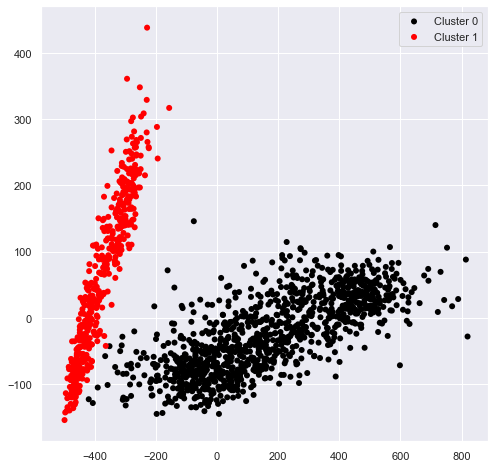

In [25]:
plt.figure(figsize=(8, 8))

for i, color in enumerate(['black', 'red']):
    inds = cluster_label == i
    x, y = Xpca[inds, 0], Xpca[inds, 1]
    plt.scatter(x, y, c=color, label="Cluster {}".format(i),
               edgecolors='none')

plt.legend()

This clustering seems to have done the job, and separated the two groups we are interested in.
Let's join these inferred cluster labels to the initial dataset:

In [26]:
pivoted['Cluster'] = cluster_label
data = data.join(pivoted['Cluster'], on=data.index.date)
data.head()

,West,East,Cluster
Date,,,
2012-10-03 00:00:00,9.0,4.0,0
2012-10-03 01:00:00,6.0,4.0,0
2012-10-03 02:00:00,1.0,1.0,0
2012-10-03 03:00:00,3.0,2.0,0
2012-10-03 04:00:00,1.0,6.0,0


Now we can find the average trend by cluster and time using a GroupBy within this updated dataset

In [27]:
by_hour = data.groupby(['Cluster', data.index.time]).mean()

In [28]:
by_hour.head()

West      East
Cluster                             
0       00:00:00  5.980392  4.992530
        01:00:00  2.786181  2.526611
        02:00:00  1.729225  1.911298
        03:00:00  1.276377  1.540616
        04:00:00  2.864613  4.263305

In [29]:
by_hour.tail()

West       East
Cluster                               
1       19:00:00  26.485417  27.641667
        20:00:00  20.529167  19.816667
        21:00:00  15.381250  14.243750
        22:00:00  12.695833  10.610417
        23:00:00  11.362500   8.383333

Finally, we can plot the average hourly trend among the days within each cluster:

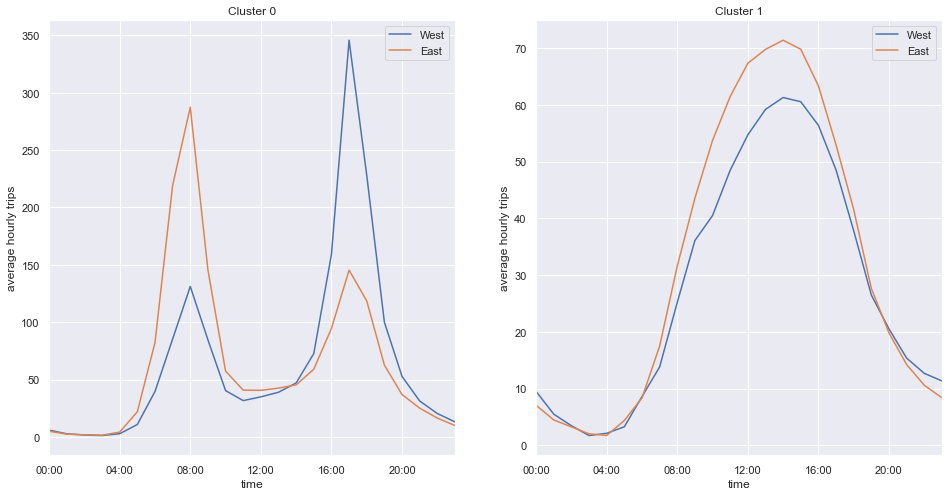

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
hourly_ticks = 4 * 60 * 60 * np.arange(6)

for i, ax in enumerate(axes.flatten()[:2]):
    by_hour.loc[i].plot(y="West", ax=ax, xticks=hourly_ticks)
    by_hour.loc[i].plot(y="East", ax=ax, xticks=hourly_ticks)
    ax.set_title('Cluster {0}'.format(i))
    ax.set_ylabel('average hourly trips')

These plots give us some insight into the interpretation of the two clusters: the first cluster shows a sharp bimodal traffic pattern, while the second shows a wide unimodal pattern.

In the bimodal cluster, we see a peak around 8:00am which is dominated by cyclists on the west sidewalk, and another peak around 5:00pm which is dominated by cyclists on the east sidewalk.
This is very clearly a commute pattern, with the majority of cyclists riding toward downtown Seattle in the morning, and away from downtown Seattle in the evening.

In the unimodal cluster, we see fairly steady traffic in each direction beginning early in the morning and going until late at night, with a peak around 2:00 in the afternoon.
This is very clearly a recreational pattern of use, with people out riding through the entire day.

This is quite fascinating: from simple unsupervised dimensionality reduction and clustering, we've discovered two distinct classes of days in the data, and found that these classes have very intuitive explanations.

## Seattle's Work Habits

Let's go one step deeper and figure out what we can learn about people (well, bicycle commuters) in Seattle from just this hourly commute data.
As a rough approximation, you might guess that these two classes of data might be largely reflective of workdays in the first cluster, and non-work days in the second.
We can check this intuition by re-plotting our projected data, except labeling them by day of the week:

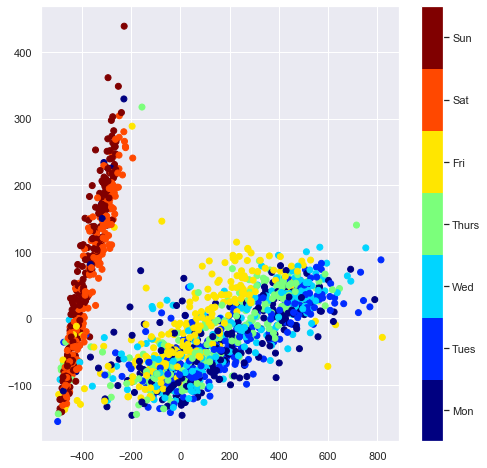

In [31]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek

plt.figure(figsize=(8, 8))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

We see that the weekday/weekend intuition holds, but only to a point: in particular, it is clear that **there are a handful of weekdays which follow the typical weekend pattern!**
Further, it's interesting to note that Fridays tend to be pulled closer to weekend days in this plot, though as a whole they still fall solidly in the work-day cluster.

Let's take a closer look at the "special" weekdays that fall in the "wrong" cluster.
We start by constructing a dataset listing the cluster id and the day of the week for each of the dates in our dataset:

In [32]:
results = pd.DataFrame({'cluster': cluster_label,
                        'is_weekend': (dayofweek > 4),
                        'weekday': pivoted.index.map(lambda x: x.strftime('%a'))},
                       index=pivoted.index)
results.head()

,cluster,is_weekend,weekday
2012-10-03,0,False,Wed
2012-10-04,0,False,Thu
2012-10-05,0,False,Fri
2012-10-06,1,True,Sat
2012-10-07,1,True,Sun


In [33]:
results[results["cluster"]==0]

,cluster,is_weekend,weekday
2012-10-03,0,False,Wed
2012-10-04,0,False,Thu
2012-10-05,0,False,Fri
2012-10-08,0,False,Mon
2012-10-09,0,False,Tue
2012-10-10,0,False,Wed
2012-10-11,0,False,Thu
2012-10-12,0,False,Fri
2012-10-15,0,False,Mon
2012-10-16,0,False,Tue


In [34]:
results[results["cluster"]==1]

,cluster,is_weekend,weekday
2012-10-06,1,True,Sat
2012-10-07,1,True,Sun
2012-10-13,1,True,Sat
2012-10-14,1,True,Sun
2012-10-20,1,True,Sat
2012-10-21,1,True,Sun
2012-10-27,1,True,Sat
2012-10-28,1,True,Sun
2012-11-03,1,True,Sat
2012-11-04,1,True,Sun


In [35]:
weekend_workdays = results.query('cluster == 0 and is_weekend')
len(weekend_workdays)

0

Apparently, there is not a single weekend during the year where Seattle cyclists as a whole decide to go to work.  Similarly, we can see how many weekdays fall in the second, recreation-oriented cluster:

In [36]:
midweek_holidays = results.query('cluster == 1 and not is_weekend')
len(midweek_holidays)

37

In [37]:
midweek_holidays

,cluster,is_weekend,weekday
2012-11-22,1,False,Thu
2012-11-23,1,False,Fri
2012-12-24,1,False,Mon
2012-12-25,1,False,Tue
2013-01-01,1,False,Tue
2013-05-27,1,False,Mon
2013-07-04,1,False,Thu
2013-09-02,1,False,Mon
2013-11-28,1,False,Thu
2013-11-29,1,False,Fri


In [38]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016', return_name=True)
holidays

2012-01-02                 New Years Day
2012-01-16    Dr. Martin Luther King Jr.
2012-02-20                Presidents Day
2012-05-28                   MemorialDay
2012-07-04                      July 4th
2012-09-03                     Labor Day
2012-10-08                  Columbus Day
2012-11-12                  Veterans Day
2012-11-22                  Thanksgiving
2012-12-25                     Christmas
2013-01-01                 New Years Day
2013-01-21    Dr. Martin Luther King Jr.
2013-02-18                Presidents Day
2013-05-27                   MemorialDay
2013-07-04                      July 4th
2013-09-02                     Labor Day
2013-10-14                  Columbus Day
2013-11-11                  Veterans Day
2013-11-28                  Thanksgiving
2013-12-25                     Christmas
2014-01-01                 New Years Day
2014-01-20    Dr. Martin Luther King Jr.
2014-02-17                Presidents Day
2014-05-26                   MemorialDay
2014-07-04      

Just for completeness, we will add to the list the day before and day after each of these holidays:

In [39]:
holidays_all = pd.concat([holidays,
                         "Day Before " + holidays.shift(-1, 'D'),
                         "Day After " + holidays.shift(1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.head()

2012-01-01                 Day Before New Years Day
2012-01-02                            New Years Day
2012-01-03                  Day After New Years Day
2012-01-15    Day Before Dr. Martin Luther King Jr.
2012-01-16               Dr. Martin Luther King Jr.
dtype: object